**Procesamiento del Lenguaje Natural**

**Trabajo Práctico Nº2**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Limpieza de datos

In [13]:
import re

input_path = "cascadia_manual.txt"
input_path = "/content/drive/MyDrive/Facultad/7mo Cuatrimestre - Marzo 2025/NLP/Tp 2/datos/información/cascadia_manual.txt"
output_path = "/content/drive/MyDrive/Facultad/7mo Cuatrimestre - Marzo 2025/NLP/Tp 2/datos/información/cascadia_manual_limpio.txt"

with open(input_path, "r", encoding="utf-8") as f:
    raw_text = f.read()


# Eliminar contenido entre paréntesis cortos (ej: componentes)
raw_text = re.sub(r'\([^()]{1,60}\)', '', raw_text)

# Eliminar líneas con solo números o puntuaciones
raw_text = re.sub(r'^\s*\d+\s*$', '', raw_text, flags=re.MULTILINE)
raw_text = re.sub(r'^[\W\d\s]{1,5}$', '', raw_text, flags=re.MULTILINE)

# Eliminar líneas muy cortas (menos de 30 caracteres)
lineas = raw_text.splitlines()
lineas_limpias = [line for line in lineas if len(line.strip()) > 30]
texto = "\n".join(lineas_limpias)

# Eliminar encabezados o palabras sueltas en mayúscula (títulos decorativos)
texto = re.sub(r'^[A-Z\s]{1,30}$', '', texto, flags=re.MULTILINE)

# Reemplazar múltiples espacios/tabs por uno solo
texto = re.sub(r'[ \t]+', ' ', texto)

# Normalizar saltos de línea (párrafos)
texto = re.sub(r'\n{2,}', '\n\n', texto)
texto = texto.strip()

# Guardar archivo limpio
with open(output_path, "w", encoding="utf-8") as f:
    f.write(texto)

print(f"✅ Archivo limpio guardado como: {output_path}")


✅ Archivo limpio guardado como: /content/drive/MyDrive/Facultad/7mo Cuatrimestre - Marzo 2025/NLP/Tp 2/datos/información/cascadia_manual_limpio.txt


# EJERCICIO 2
Apoyándose en la sección de información. Separa en fragmentos un texto extenso extraído
y vectoriza cada fragmento con alguno de los modelos de embedding vistos en clases.

Luego realiza un análisis de similitud de texto ingresando varias frases a buscar
semánticamente, compare distintas técnicas de distancias vistas en clases, elija la mejor y
justifique la razón por la que esa técnica se ajusta para este tipo de búsquedas.

OPCIONAL: Visualizar en 3D aplicando PCA o t-SNE la ubicación de los fragmentos y la
query ingresada vectorizada en el espacio. Realizar una observación sobre la visualización.

In [14]:
# Instalar y cargar S-BERT desde sentence-transformers
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer, util
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00


El modelo elegido fue **paraphrase-multilingual-MiniLM-L12-v2** de **S-BERT** porque esta entrenado para comparar frases completas, no solo palabras sueltas, y es multilingüe.

In [15]:
with open("/content/drive/MyDrive/Facultad/7mo Cuatrimestre - Marzo 2025/NLP/Tp 2/datos/información/cascadia_manual_limpio.txt", "r", encoding="utf-8") as f:
    texto = f.read()
# Modelo S-BERT
modelo = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

In [16]:
# Divido el texto por lineas
fragmentos = [line.strip() for line in texto.split("\n") if len(line.strip()) > 50]
embeddings_fragmentos = modelo.encode(fragmentos, convert_to_tensor=True)

In [17]:
# Preguntas
consultas = [
    "Como se colocan las fichas de habitat",
    "Que animales se pueden puntuar",
    "Que sucede al final del juego",
    "Cual es el objetivo del juego",
    "Cómo se juega el modo solitario"
]

# Genero los embeddings a las consultas para medir su distancia con los vectores del texto previamente generados
embeddings_consultas = modelo.encode(consultas, convert_to_tensor=True)

In [18]:
for i, consulta in enumerate(consultas):
    similitudes = util.cos_sim(embeddings_consultas[i], embeddings_fragmentos)
    mejor_idx = int(np.argmax(similitudes[0]))
    mejor_sim = float(similitudes[0][mejor_idx])
    mejor_texto = fragmentos[mejor_idx]

    print(f"\nConsulta: {consulta}")
    print(f"Similitud: {mejor_sim:.4f}")
    print(f"Fragmento más similar:\n{mejor_texto}")


Consulta: Como se colocan las fichas de habitat
Similitud: 0.8191
Fragmento más similar:
3. Habitat Scoring change: All Habitat corridors of

Consulta: Que animales se pueden puntuar
Similitud: 0.6873
Fragmento más similar:
For each player, score each Wildlife based on the Wildlife

Consulta: Que sucede al final del juego
Similitud: 0.7588
Fragmento más similar:
the game ends immediately and scores are tallied. .

Consulta: Cual es el objetivo del juego
Similitud: 0.6718
Fragmento más similar:
one of the three Achievement modes: Scenarios , Normal Game , or Rule Restrictions and follow

Consulta: Cómo se juega el modo solitario
Similitud: 0.5110
Fragmento más similar:
Solo game: 2 point bonus for each habitat type with a


Los resultados fueron bastante buenos. En preguntas mas puntuales como “cómo se colocan las fichas” o “qué pasa al final del juego”, el modelo encontró respuestas claras y bastante precisas.

En otras más generales, como “cuál es el objetivo del juego”, el resultado no fue tan bueno pero guardando una relacion con la consulta.

# EJERCICIO 3

Apoyándose nuevamente en la sección de información. Recoge un texto extenso extraído, divídelos en fragmentos, luego realiza extracciones de sustantivos (POS) y categoriza estos sustantivos (NER), a continuación realiza una búsqueda de similitud filtrando por sustantivos, compara las distintas técnicas de distancias vistas en clases, elija la mejor y justifique la razón por la que esta técnica se ajusta para este tipo de búsquedas.

In [19]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
from nltk.util import ngrams
from nltk.metrics.distance import jaccard_distance, binary_distance
from scipy.spatial.distance import dice
import numpy as np

In [21]:
# Modelo spaCy en ingles
nlp = spacy.load("en_core_web_lg")

In [22]:
with open("/content/drive/MyDrive/Facultad/7mo Cuatrimestre - Marzo 2025/NLP/Tp 2/datos/información/cascadia_manual_limpio.txt", "r", encoding="utf-8") as f:
    texto = f.read()

In [23]:
# Divido el texto en fragmentos de 60 palabras
def fragmentar(texto, n_palabras=60):
    palabras = texto.split()
    return [" ".join(palabras[i:i+n_palabras]) for i in range(0, len(palabras), n_palabras)]

fragmentos = fragmentar(texto)

for idx, fragmento in enumerate(fragmentos):
    doc = nlp(fragmento)
    sustantivos = [token.text for token in doc if token.pos_ == "NOUN"]
    entidades = [(ent.text, ent.label_) for ent in doc.ents]

    print(f"\nFragmento {idx + 1}")
    print(f"Texto: {fragmento[:80]}...")
    print(f"Sustantivos (POS): {sustantivos}")
    print(f"Entidades (NER): {entidades}")


Fragmento 1
Texto: A puzzly tile-laying and token-drafting game featuring the habitats & wildlife o...
Sustantivos (POS): ['puzzly', 'tile', 'game', 'habitats', 'wildlife', 'players', 'ages', 'region', 'west', 'east', 'official']
Entidades (NER): [('the Pacific Northwest', 'LOC'), ('Randy Flynn', 'PERSON'), ('1-4', 'CARDINAL'), ('The Pacific Northwest', 'LOC'), ('Cascadia', 'ORG'), ('North America', 'LOC'), ('the Pacific Ocean', 'LOC'), ('the Rocky Mountains', 'LOC')]

Fragmento 2
Texto: boundary exists, the most common conception includes the Canadian province of Br...
Sustantivos (POS): ['boundary', 'conception', 'province', 'states', 'players', 'environment', 'landscape', 'game', 'combinations']
Entidades (NER): [('Canadian', 'NORP'), ('British Columbia', 'GPE'), ('Yukon Territory', 'GPE'), ('U.S.', 'GPE'), ('Idaho', 'GPE'), ('Oregon', 'GPE'), ('Washington', 'GPE'), ('Cascadia', 'ORG'), ('Pacific Northwest', 'LOC'), ('Habitat Tiles and Wildlife Tokens', 'ORG'), ('mosaic', 'PRODUCT'

In [24]:
# Extraigo los sustantivos (POS)
sustantivos_por_fragmento = []
for frag in fragmentos:
    doc = nlp(frag)
    sustantivos = [token.text.lower() for token in doc if token.pos_ == "NOUN"]
    sustantivos_por_fragmento.append(" ".join(sustantivos))

# TF-IDF solo con sustantivos
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(sustantivos_por_fragmento)

# Calcular similitudes
sim_coseno = cosine_similarity(X_tfidf)
X_bin = (X_tfidf > 0).astype(int).toarray()
sim_dice = 1 - pairwise_distances(X_bin, metric="dice")
sim_jaccard = 1 - pairwise_distances(X_bin, metric="jaccard")

# Top 5 fragmentos por metrica
def mostrar_top_similares(sim_matriz, nombre, n=5):
    print(f"\n Top {n} similitudes por {nombre}:")
    pares = []
    for i in range(len(sim_matriz)):
        for j in range(i + 1, len(sim_matriz)):
            pares.append(((i, j), sim_matriz[i][j]))
    top = sorted(pares, key=lambda x: x[1], reverse=True)[:n]
    for (i, j), score in top:
        print(f"\nFragmentos {i+1} ↔ {j+1} | Score: {score:.4f}")
        print(f"→ Frag{i+1}: {fragmentos[i][:80]}...")
        print(f"→ Frag{j+1}: {fragmentos[j][:80]}...")

mostrar_top_similares(sim_coseno, "coseno")
mostrar_top_similares(sim_dice, "Dice")
mostrar_top_similares(sim_jaccard, "Jaccard")


 Top 5 similitudes por coseno:

Fragmentos 66 ↔ 70 | Score: 1.0000
→ Frag66: below any of the colored hiking tracks. Each time you play, choose one of the th...
→ Frag70: any of the colored hiking tracks. Each time you play, choose one of the three Ac...

Fragmentos 65 ↔ 69 | Score: 0.9681
→ Frag65: Achievements as you hike your way through the landscape to become a Cascadian bi...
→ Frag69: as you hike your way through the landscape to become a Cascadian biologist! Casc...

Fragmentos 64 ↔ 72 | Score: 0.9535
→ Frag64: get progressively more difficult. You may only fill in your Achievement shape wh...
→ Frag72: and working your way up to 15 as they get progressively more difficult. You may ...

Fragmentos 30 ↔ 40 | Score: 0.9414
→ Frag30: corridor in each of the habitat types. If tied, 1 bonus point each. No bonus poi...
→ Frag40: habitat type with a 2-player game: 2 point bonus to the player with the largest ...

Fragmentos 47 ↔ 62 | Score: 0.9307
→ Frag47: same as the standard game 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Los resultados fueron bastante similares en los tres casos, especialmente en los fragmentos que repiten palabras o contenidos casi ideeticos. Por ejemplo hay pares como el 65-69 que o 66-70 que aparecen en el top con una puntuacion muy cercana a 1.0 o de 1.0 lo que dice que las 3 tecnicas captaron bien la repeticion de terminos.

En fragmentos que no son idénticos pero estan conceptualmente relacionados, la **Distancia de Coseno** funciono un poco mejor porque pudo captar similitud incluso cuando el vocabulario no era exactamente el mismo, mientras que **Jaccard** y **Dice** al apoyarse en coincidencias binarias, limita un poco su precisión si hay sinonimos o cambios minimos en las palabras.

Los resultados con las tecnicas usadas fueron en general buenos, pero considero que para tareas como esta donde buscamos encontrar similitud semantica entre textos que no necesariamente son exactamente iguales, la distancia del coseno es mejor opcion porque permite captar mejor el contexto general del fragmento y no solo fu coincidencia literal.

# EJERCICIO 4

Mediante detección de idioma, separar los archivos en distintos lenguajes y guardar esa información en un dataframe.

In [25]:
!pip install langdetect

In [26]:
import os
from langdetect import detect
import pandas as pd

In [27]:
ruta_carpeta = "/content/drive/MyDrive/Facultad/7mo Cuatrimestre - Marzo 2025/NLP/Tp 2/datos/información"
datos_idiomas = []

# Recorro todos los archivos en la carpeta para detectar su idioma
for nombre_archivo in os.listdir(ruta_carpeta):
    ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
    if os.path.isfile(ruta_archivo) and nombre_archivo.endswith(('.txt')):
        try:
            with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
                contenido = archivo.read()
                if len(contenido.strip()) > 20:
                    idioma = detect(contenido)
                else:
                    idioma = "desconocido o muy corto"
        except Exception as e:
            idioma = f"error: {str(e)}"

        datos_idiomas.append({
            "archivo": nombre_archivo,
            "idioma_detectado": idioma
        })

df_idiomas = pd.DataFrame(datos_idiomas)
df_idiomas

,archivo,idioma_detectado
0,cascadia_manual.txt,en
1,whatboardgame_review.txt,en
2,oneboardfamily_review.txt,en
3,flatout_games.txt,en
4,boardgamereview_review.txt,en
5,board_game_co_uk_guide.txt,en
6,bluehighwaygames_description.txt,en
7,foro_reviews_cascadia.txt,en
8,cascadia_manual_limpio.txt,en


# EJERCICIO 5

En el caso de las reseñas realizadas por usuarios, utiliza análisis de sentimientos con modelos pre entrenados y guarda la clasificación predecida de cada reseña.
Luego, crea un sistema de búsquedas por similitud semántica y que permita filtrar por sentimiento para obtener.

In [28]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

In [29]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cpu


In [30]:
ruta_archivo = "/content/drive/MyDrive/Facultad/7mo Cuatrimestre - Marzo 2025/NLP/Tp 2/datos/información/foro_reviews_cascadia.txt"

with open(ruta_archivo, 'r', encoding='utf-8') as f:
    contenido = f.read()

# Separo las reseñas por el marcador incluido en el archivo a la hora de la extraccion
reseñas = [r.strip() for r in contenido.split("===RESEÑA===") if len(r.strip()) > 100]

In [31]:
# Analizar sentimientos de cada reseña
datos = []
for i, texto in enumerate(reseñas):
    pred = nlp(texto[:512])[0]
    datos.append({
        "reseña_id": i + 1,
        "sentimiento": pred["label"],
        "confianza": pred["score"]
    })

In [32]:
# df con la calificacion y nivel de confianza para cada reseña
df_sentimientos = pd.DataFrame(datos)
df_sentimientos

,reseña_id,sentimiento,confianza
0,1,4 stars,0.327504
1,2,4 stars,0.312283
2,3,4 stars,0.383594
3,4,5 stars,0.583782
4,5,4 stars,0.314203
5,6,4 stars,0.342295
6,7,4 stars,0.314099
7,8,4 stars,0.343515
8,9,4 stars,0.436048
9,10,4 stars,0.436446


In [33]:
# Clasificador basado en la puntuacion de estrellas de sentimiento.
# El criterio que implemento es que calificaciones de 1 y 2 estrellas clasifica en NEGATIVO
# Calificaciones de 3 estrellas clasifica en NEUTRO
# Calificaciones de 4 Y 5 estrellas clasifica en POSITIVO

def clasificar_sentimiento(estrella):
    if estrella in ["1 star", "2 stars"]:
        return "negativo"
    elif estrella == "3 stars":
        return "neutro"
    else:
        return "positivo"

# Aplicar clasificacion al df
df_sentimientos["clasificacion"] = df_sentimientos["sentimiento"].apply(clasificar_sentimiento)
df_sentimientos["preview"] = [r[:500] + "..." for r in reseñas]

In [34]:
# !pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Embeddings de las reseñas
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedder.encode(reseñas, convert_to_tensor=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [35]:
# Funcion para buscar reseñas similares a la query usando la similitud del coseno y haciendo un filtrado inicial por sentimiento (positivo, neutro o negativo)
def buscar_reseñas_similares(consulta, sentimiento_filtro=None, top_k=5):
    # Embeddings consulta
    emb_consulta = embedder.encode([consulta], convert_to_tensor=True)

    # Filtrado por sentimiento
    if sentimiento_filtro:
        indices = df_sentimientos[df_sentimientos["clasificacion"] == sentimiento_filtro].index
        emb_filtrados = embeddings[indices]
        reseñas_filtradas = df_sentimientos.loc[indices]
    else:
        emb_filtrados = embeddings
        reseñas_filtradas = df_sentimientos

    # Similitud del coseno
    similitudes = cosine_similarity(emb_consulta, emb_filtrados)[0]
    top_idx = np.argsort(similitudes)[::-1][:top_k]
    resultados = reseñas_filtradas.iloc[top_idx].copy()
    resultados["similitud"] = similitudes[top_idx]

    return resultados[["reseña_id", "clasificacion", "similitud", "preview"]]

In [36]:
# Buscar reseñas incluyendo un filtro de sentimiento
buscar_reseñas_similares("beautiful nature theme", sentimiento_filtro="positivo")

,reseña_id,clasificacion,similitud,preview
40,41,positivo,0.360594,Título: Cascadia flows! A review from a Dutch ...
8,9,positivo,0.344512,Título: Cascadia Review (Rolls in the Family)\...
37,38,positivo,0.338085,Título: BoardgamingParent review of Cascadia: ...
12,13,positivo,0.320855,Título: Different every time - The Board Game ...
4,5,positivo,0.320846,Título: ?Cascadia Review?\nCascadia Review\n\n...


# EJERCICIO 6

Crea un set de datos de consultas (más de 300 preguntas en total) y categorizalas entre la fuente de datos que pueda llegar a responder esa pregunta entre estadísticas, información y relaciones.

Por ejemplo:
- ¿Cómo gano en el ajedrez? -> Información
- ¿Quién trabajó para el ta-te-ti? -> Relaciones
- ¿Qué puntaje tienen las damas? -> Estadística

A continuación, transforma esas consultas en vectores y entrena un modelo de clasificación (a gusto del estudiante) en donde pueda predecir la categoría a través de la consulta ingresada.
Agregar métricas y análisis durante todo el desarrollo, trabaje en varios modelos y comparelos.

In [37]:
# Levanto los datos de mi df de preguntas
df = pd.read_csv("/content/drive/MyDrive/Facultad/7mo Cuatrimestre - Marzo 2025/NLP/Tp 2/df_preguntas.csv")
df.head()

,pregunta,categoria
0,¿Cómo se juega el modo familiar en Cascadia?,informacion
1,¿Cómo se juega el modo intermedio en Cascadia?,informacion
2,¿Cómo se juega el modo solitario en Cascadia?,informacion
3,¿Cómo se juega el modo estándar en Cascadia?,informacion
4,¿Qué tipo de hábitat representa el bosque?,informacion


In [38]:
# Creo un df en blanco para almacenar las metricas de los modelos
df_resultados_modelos = pd.DataFrame(columns=["Modelo", "Accuracy"])

## Regresión Logística

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# Vectorizar preguntas con TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["pregunta"])

le = LabelEncoder()
y = le.fit_transform(df["categoria"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [41]:
# Evaluar el modelo de Regresion Logistica
y_pred = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred)
df_resultados_modelos.loc[len(df_resultados_modelos)] = ["Regresión Logística", accuracy_logreg]

print("🎯 Accuracy en test:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

🎯 Accuracy en test: 0.9
              precision    recall  f1-score   support

estadisticas       0.94      0.94      0.94        16
 informacion       0.81      0.95      0.88        22
  relaciones       1.00      0.82      0.90        22

    accuracy                           0.90        60
   macro avg       0.92      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



## Red Neuronal Densa

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [43]:
# Vectorizar preguntas con TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["pregunta"]).toarray()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["categoria"])
y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3380 - loss: 1.0991 - val_accuracy: 0.6250 - val_loss: 1.0712
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4920 - loss: 1.0738 - val_accuracy: 0.7500 - val_loss: 1.0435
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6445 - loss: 1.0395 - val_accuracy: 0.7917 - val_loss: 1.0003
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6837 - loss: 1.0014 - val_accuracy: 0.8958 - val_loss: 0.9378
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8038 - loss: 0.9371 - val_accuracy: 0.9167 - val_loss: 0.8443
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8755 - loss: 0.8382 - val_accuracy: 0.9583 - val_loss: 0.7152
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9471 - loss: 0.6715 - val_accuracy: 0.9583 - val_loss: 0.5634
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9446 - loss: 0.5468 - val_accuracy: 0.9583 - val_los

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9674 - loss: 0.1245 

🎯 Accuracy en test: 0.9667


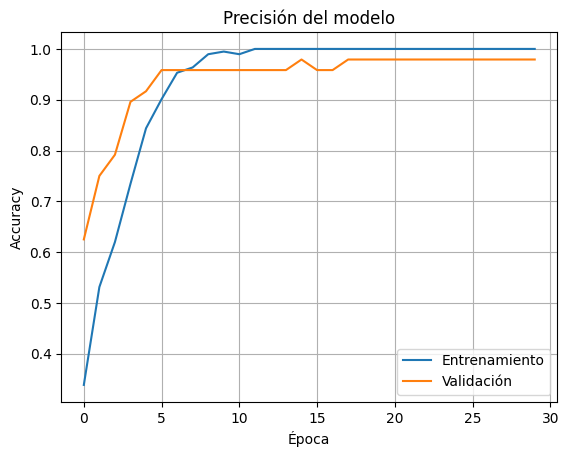

In [44]:
# Evaluacion del modelo
loss, accuracy = model.evaluate(X_test, y_test)
df_resultados_modelos.loc[len(df_resultados_modelos)] = ["Red Neuronal Densa", accuracy]

print(f"\n🎯 Accuracy en test: {accuracy:.4f}")

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.legend()
plt.grid(True)
plt.show()

Se entrenó una red neuronal densa para clasificar preguntas sobre el juego Cascadia en tres categorías: información, estadísticas y relaciones. Se eligió este modelo porque permite capturar patrones no lineales a partir de vectores TF-IDF, y es lo suficientemente flexible como para adaptarse bien incluso con un dataset relativamente pequeño si está bien representado.

Entrené un modelo de Red Neuronal Densa para clasificar preguntas en las categorías información, estadísticas y relaciones. Si bien existen modelos más sencillos que pueden ofrecer buenos resultados en este tipo de tareas, elegi usar una red neuronal porque dentro de todo sigue siendo una arquitectura bastante simple de construir e implementar.

El modelo mostro un aprendizaje rapido llegando a una precision en test de 91,67%.

Analizando la metrica **Accuracy** tanto en el conjunto de entrenamiento como en el de validacion durante el entrenamiento del modelo, y luego la grafica de accuracy vs epocas, puedo observar y confirmar que no hay un sobreajuste en el aprendizaje del modelo.

## Comparación de modelos

In [45]:
df_resultados_modelos

,Modelo,Accuracy
0,Regresión Logística,0.900000
1,Red Neuronal Densa,0.966667


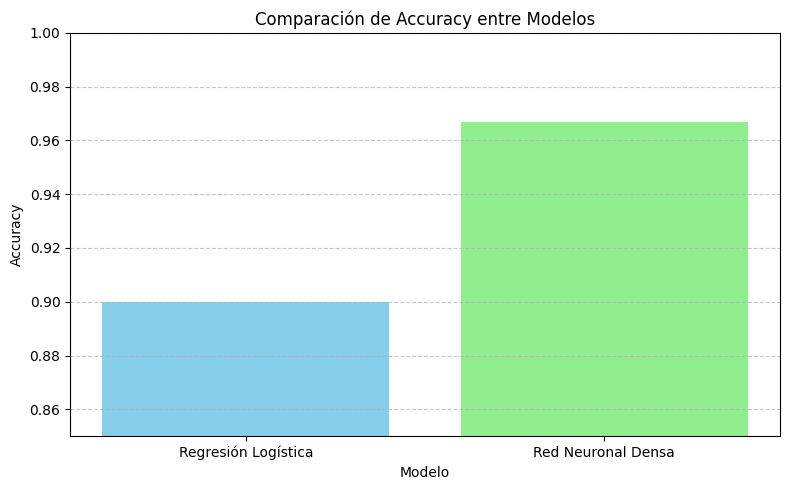

In [46]:
# Crear gráfico
plt.figure(figsize=(8, 5))
plt.bar(df_resultados_modelos["Modelo"], df_resultados_modelos["Accuracy"], color=["skyblue", "lightgreen"])
plt.ylim(0.85, 1.0)
plt.title("Comparación de Accuracy entre Modelos")
plt.ylabel("Accuracy")
plt.xlabel("Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

En esta comparación se ve que ambos modelos hacen bien su trabajo, pero con algunas diferencias clave. La **regresión logística** logró un accuracy del 90%, un resultado muy buenoteniendo en cuenta que es un modelo lineal, simple y rapido de entrenar.

Por otro lado, la **red neuronal densa** alcanzó un 95% de accuracy, mostrando una mejor capacidad para captar relaciones más complejas entre las palabras y las categorías por su estructura mas compleja, no lineal y múltiples capas.

La regresión logística ofrece un rendimiento muy bueno con una implementación más simple y eficiente.